# EDA in the dataset

In [28]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('spambase.csv')

# df = pd.read_csv('cleaned_filename.csv')

## checking for null columns

In [2]:
# Check for null values in the dataframe
if df.isnull().values.any():
    print('There are null values in the file.')
else:
    print('There are no null values in the file.')

There are no null values in the file.


## checking for duplicated rows

In [4]:
# Check for duplicated records in the dataframe
if df.duplicated().any():
    print('There are duplicated records in the file.')
else:
    print('There are no duplicated records in the file.')

There are duplicated records in the file.


## getting number of records

In [5]:
# Get the number of records in the dataframe
num_records = len(df)
print(f'There are {num_records} records in the file.')

There are 4600 records in the file.


## removing duplicated rows

In [6]:
# Get the number of duplicated rows in the dataframe
num_duplicates = df.duplicated().sum()
print(f'There are {num_duplicates} duplicated rows in the file.')

# Remove duplicated rows from the dataframe
df.drop_duplicates(inplace=True)

# Save the cleaned dataframe to a new CSV file
df.to_csv('cleaned_filename.csv', index=False)

# import cleaned dataset
df = pd.read_csv('cleaned_filename.csv')

# Get the number of records in the dataframe
num_records = len(df)
print(f'There are {num_records} records in the file after removing duplicated records.')

There are 391 duplicated rows in the file.
There are 4209 records in the file after removing duplicated records.


## dataset visualization

In [7]:
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [8]:
df.shape

(4209, 58)

In [9]:
df.describe

<bound method NDFrame.describe of          0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...   0.41  \
0     0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
1     0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
2     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
3     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.000   
...    ...   ...     ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4204  0.31  0.00    0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4205  0.00  0.00    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4206  0.30  0.00    0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4207  0.96  0.00    0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4208  0.00  0.00    0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0

# KNN without applying PCA

## defining X, y dataset

In [29]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [30]:
X.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

## split the dataset into train and test

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## scaling

In [33]:
from sklearn.preprocessing import StandardScaler
# Scale the data using StandardScaler --> then easy to find best K-factor when the data is scaled to have a standard range
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## KNN classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# Define the KNN classifier
knn = KNeighborsClassifier()

## performing GridSearch to find K-factor

In [35]:
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [1,3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [36]:
# Define the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid,n_jobs=-1, verbose=10)

In [37]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             verbose=10)

In [38]:
# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best score:  0.9100105378724079


In [39]:
# Get the best k value from the GridSearchCV results
best_k = grid_search.best_params_['n_neighbors']

print('best k-factor',best_k)

best k-factor 7


In [40]:
# Fit a k-NN classifier on the training set using the best parameters
knn = KNeighborsClassifier(n_neighbors=best_k, weights=grid_search.best_params_['weights'], metric=grid_search.best_params_['metric'])
knn.fit(X_train, y_train)
knn.score(X_train,y_train)

0.9994059994059994

In [41]:
knn.score(X_test, y_test)

0.9204275534441805

## Evaluation

### train and test score

In [42]:
print('train score - ',end='')
knn.score(X_train,y_train)

train score - 

0.9994059994059994

In [43]:
print('test score - ',end='')
knn.score(X_test, y_test)

test score - 

0.9204275534441805

### confusion matrix

In [44]:
y_predicted = knn.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

Text(60.222222222222214, 0.5, 'Truth')

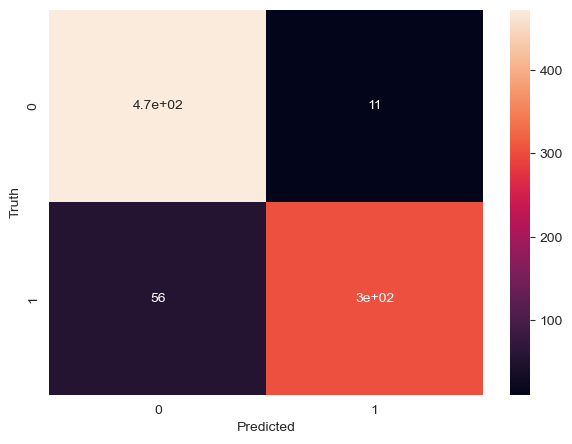

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### classification report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       483
           1       0.96      0.84      0.90       359

    accuracy                           0.92       842
   macro avg       0.93      0.91      0.92       842
weighted avg       0.92      0.92      0.92       842



## ROC curve

In [48]:
# predict probabilities on test set
y_pred_prob = knn.predict_proba(X_test)[:, 1]

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

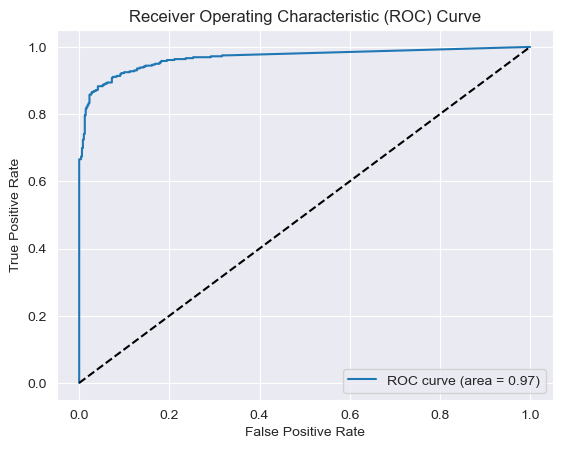

In [50]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## performing cross validation to find k-factor

In [51]:
# Set the range of k values to try
k_range = range(1, 21)

In [52]:
from sklearn.model_selection import cross_val_score
# Calculate cross-validation scores for each value of k
cv_scores = []
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k, weights=grid_search.best_params_['weights'], metric=grid_search.best_params_['metric'])
    scores = cross_val_score(knn2, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [53]:
# Find the k value with the highest cross-validation score
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"The best k value is {best_k} with a cross-validation score of {max(cv_scores):.3f}")

The best k value is 11 with a cross-validation score of 0.811


In [54]:
# Fit a k-NN classifier on the training set using the best k-factor from cross validation - 11
knn2 = KNeighborsClassifier(n_neighbors=best_k, weights=grid_search.best_params_['weights'], metric=grid_search.best_params_['metric'])
knn2.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

## Evaluation

### train and test score

In [55]:
print('train score - ',end='')
knn2.score(X_train,y_train)

train score - 

0.9994059994059994

In [56]:
print('test score - ',end='')
knn2.score(X_test,y_test)

test score - 

0.9204275534441805

### confusion matrix

In [57]:
y_predicted = knn2.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

Text(60.222222222222214, 0.5, 'Truth')

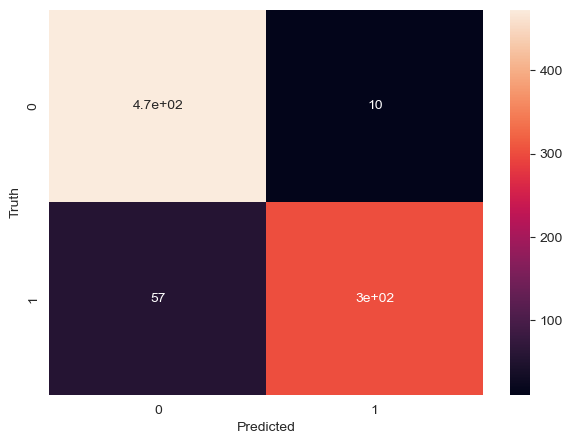

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### classification report

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       483
           1       0.97      0.84      0.90       359

    accuracy                           0.92       842
   macro avg       0.93      0.91      0.92       842
weighted avg       0.92      0.92      0.92       842



### ROC curve

In [72]:
# predict probabilities on test set
y_pred_prob2 = knn2.predict_proba(X_test)[:, 1]

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve and AUC
knn2_fpr, knn2_tpr, thresholds = roc_curve(y_test, y_pred_prob2)
knn2_roc_auc = auc(knn2_fpr, knn2_tpr)

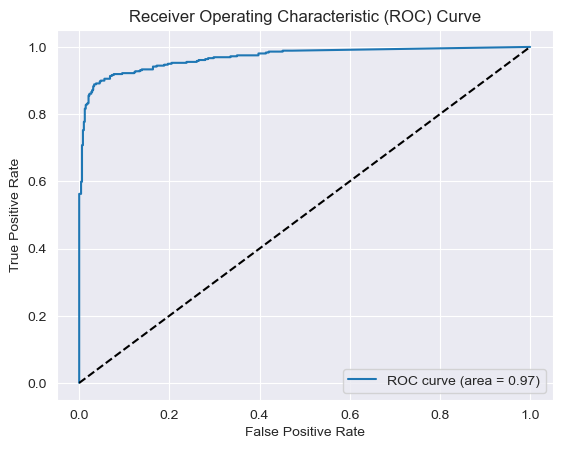

In [74]:
# Plot ROC curve
plt.plot(knn2_fpr, knn2_tpr, label='ROC curve (area = %0.2f)' % knn2_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

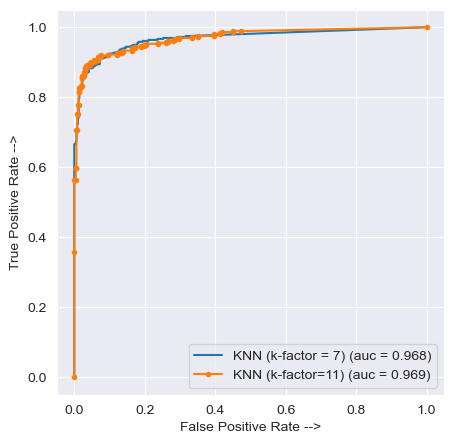

In [71]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='KNN (k-factor = 7) (auc = %0.3f)' % roc_auc)
plt.plot(knn2_fpr, knn2_tpr, marker='.', label='KNN (k-factor=11) (auc = %0.3f)' % knn2_roc_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()